In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [34]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

PATH = Path('/content/gdrive/MyDrive/data')

In [35]:
list(PATH.glob('*'))

[PosixPath('/content/gdrive/MyDrive/data/aclImdb_v1.tar.gz'),
 PosixPath('/content/gdrive/MyDrive/data/title.basics.tsv.gz'),
 PosixPath('/content/gdrive/MyDrive/data/title.ratings.tsv.gz'),
 PosixPath('/content/gdrive/MyDrive/data/title.crew.tsv.gz'),
 PosixPath('/content/gdrive/MyDrive/data/title.principals.tsv.gz'),
 PosixPath('/content/gdrive/MyDrive/data/title.akas.tsv.gz'),
 PosixPath('/content/gdrive/MyDrive/data/movie_metadata.csv'),
 PosixPath('/content/gdrive/MyDrive/data/datoslimpios.csv')]

In [36]:
import pandas as pd

title_basics = pd.read_csv(PATH / 'datoslimpios.csv')
#import gzip

In [37]:
movies_almodeladoReserva = title_basics

In [38]:
movies_almodelado = title_basics

In [39]:
movies_almodelado.isnull().sum()

budget                  0
original_language       0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
vote_average            0
vote_count              0
popularity_2            0
production_countries    0
release_anio            0
mes_1.0                 0
mes_2.0                 0
mes_3.0                 0
mes_4.0                 0
mes_5.0                 0
mes_6.0                 0
mes_7.0                 0
mes_8.0                 0
mes_9.0                 0
mes_10.0                0
mes_11.0                0
mes_12.0                0
genres_2                0
dtype: int64

In [40]:
movies_almodelado.dtypes

budget                  int64
original_language       int64
revenue                 int64
runtime                 int64
spoken_languages        int64
status                  int64
vote_average            int64
vote_count              int64
popularity_2            int64
production_countries    int64
release_anio            int64
mes_1.0                 int64
mes_2.0                 int64
mes_3.0                 int64
mes_4.0                 int64
mes_5.0                 int64
mes_6.0                 int64
mes_7.0                 int64
mes_8.0                 int64
mes_9.0                 int64
mes_10.0                int64
mes_11.0                int64
mes_12.0                int64
genres_2                int64
dtype: object

*Tratamiento de los atipicos*

In [41]:
movies_almodelado.drop(movies_almodelado[movies_almodelado.runtime > 2000].index, inplace=True)

In [42]:
#No me alcanza la memoria RAM  de google colab
#def num(tiempo):
 #   if tiempo >= 20000:
  #      return movies_almodelado['runtime'].mean()
   # else:
    #    return movies_almodelado['runtime']

#movies_almodelado['production_countries'] = movies_almodelado['production_countries'].apply(num)

In [44]:
movies_almodelado_revenue = movies_almodelado['revenue'] #solo me quedo con la veriable objetivo.

Distibucion de los datos entre cada una de las variables 

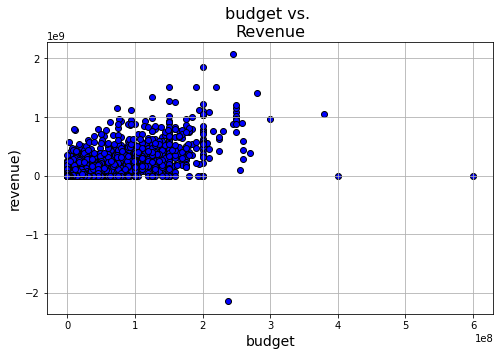

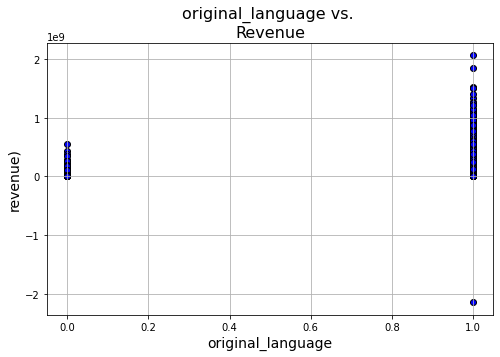

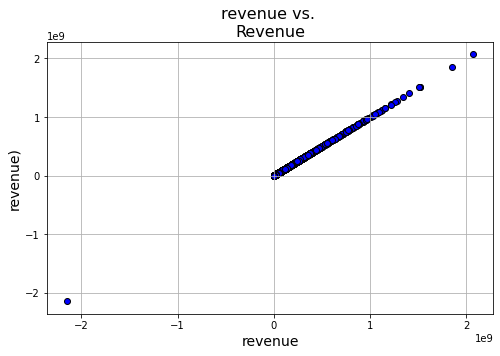

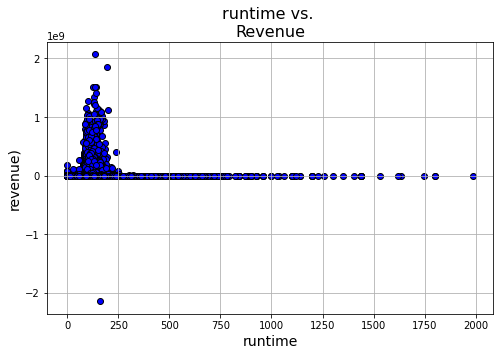

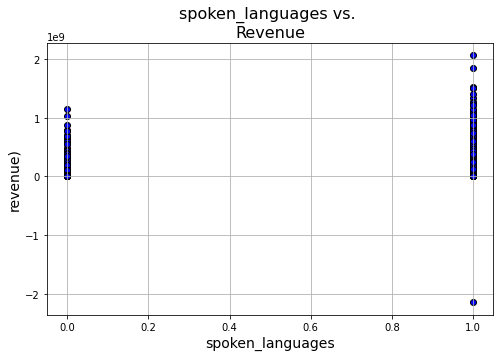

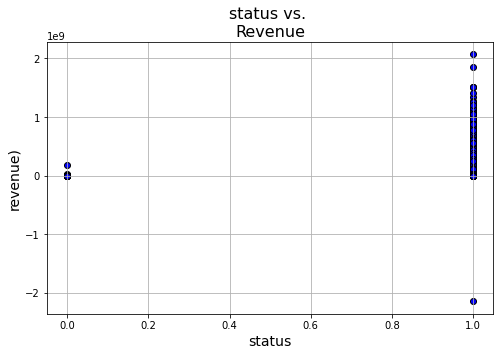

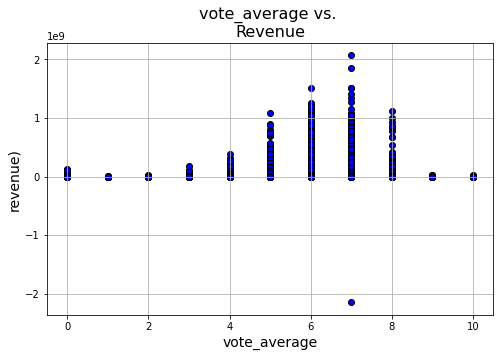

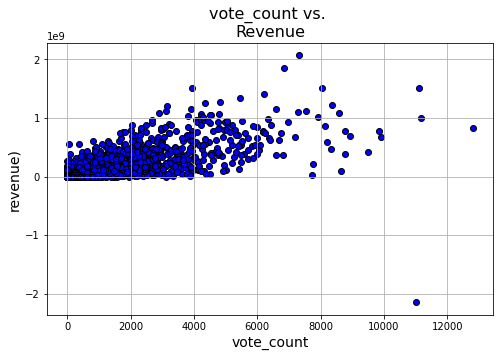

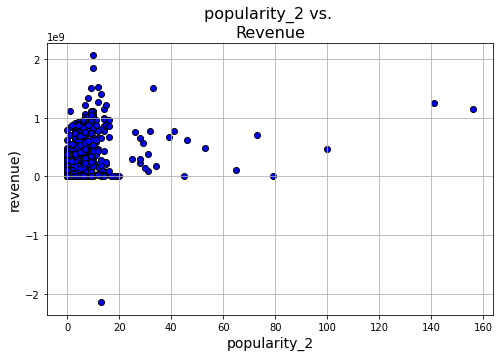

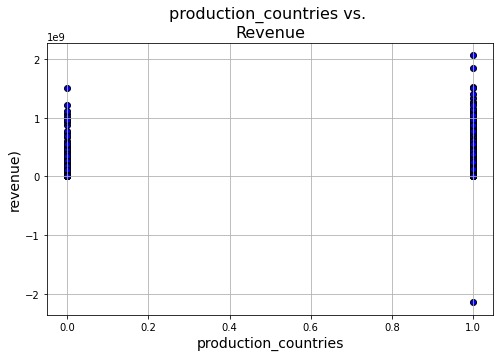

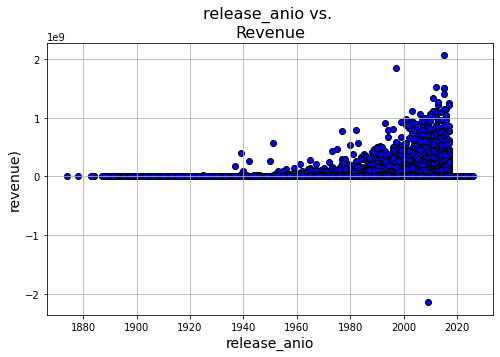

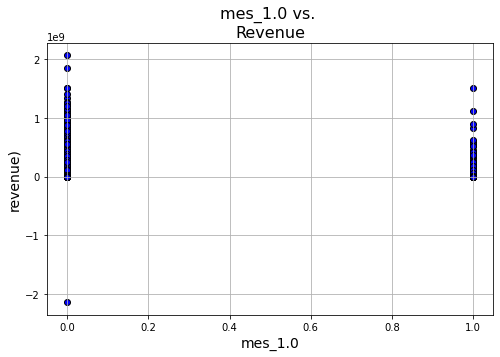

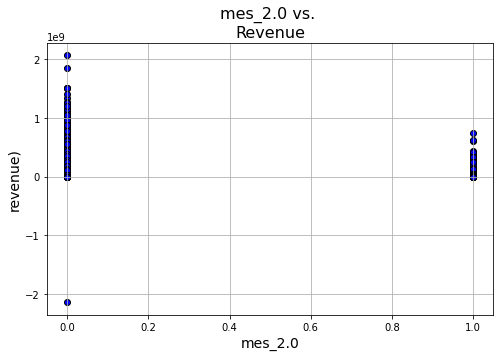

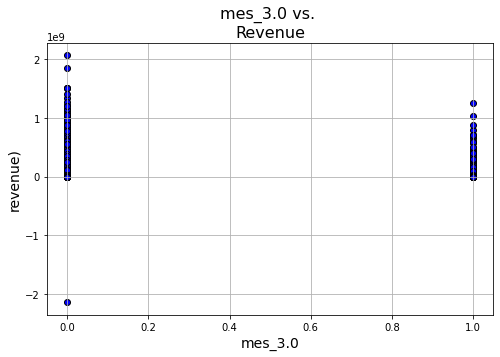

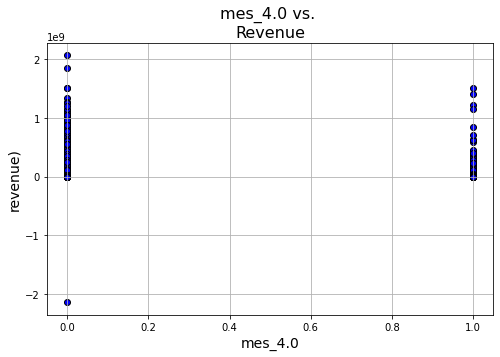

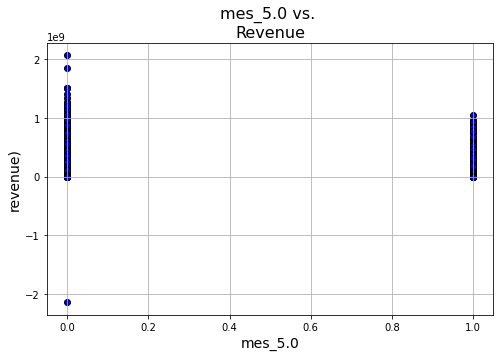

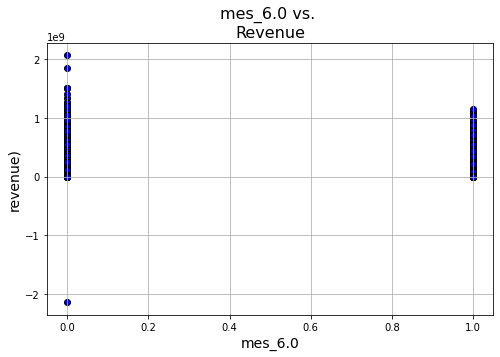

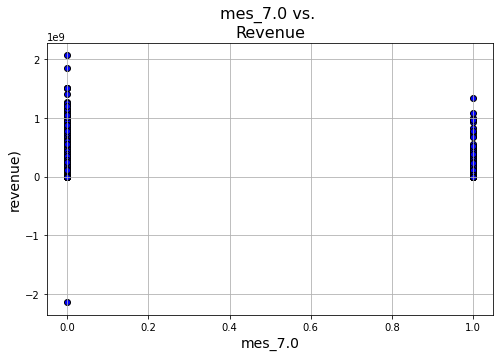

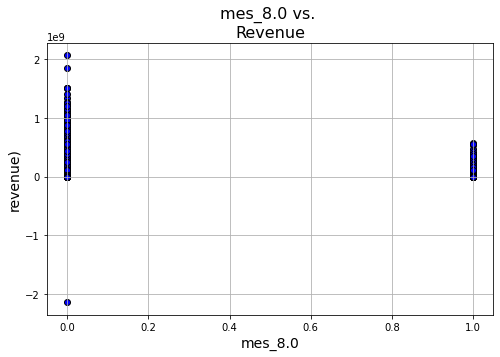

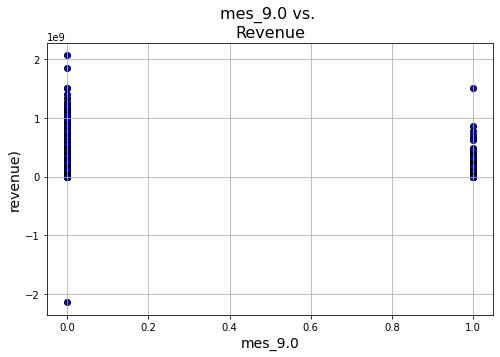

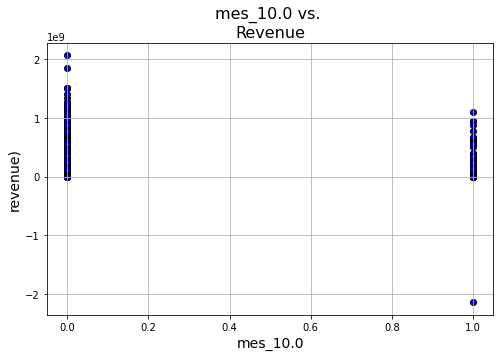

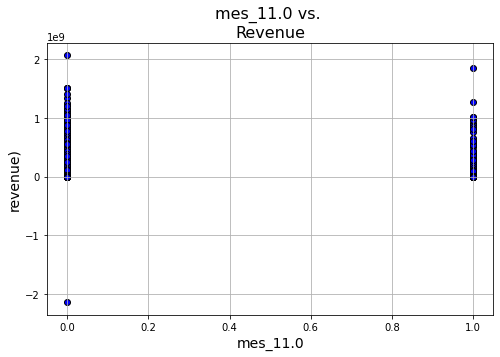

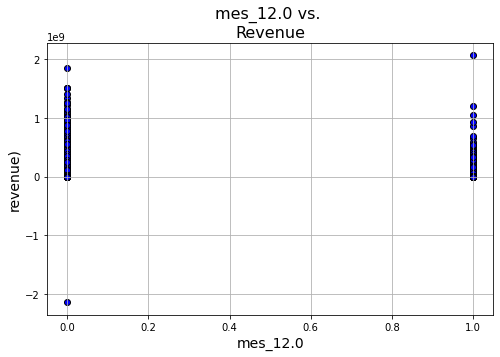

In [45]:
for c in movies_almodelado.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nRevenue".format(c),fontsize=16)
    plt.scatter(x=movies_almodelado[c],y=movies_almodelado['revenue'],color='blue',edgecolor='k')
    plt.grid(True)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('revenue)',fontsize=14)
    plt.show()

**Apuntes sobre el modelo**

Dado que la variable dependiente se trata de una variable continua (revenue) estaríamos dentro de las tecnicas de machine learning de *aprendizaje supervisado* modelos de regresión. Por lo que intentamos predecir el valor de la variable en cuestión. 

Hay que saber cual es el público objetivo y elegir la variable a predecir. El  público objetivo de este modelo serían **productoras de cine** que deseen **maxiizar la rentabilidad de la pelicula** (variable a predecir).

*vote_average* y *vote_count* no serían variables con aplicación real ya que se obtienen expost publicación de la pelicula. 

In [46]:
borrar = ['revenue','mes_12.0','vote_average','vote_count','popularity_2']
for i in borrar:
    movies_almodelado.drop(i, axis=1, inplace=True)

Las variables que la productra controla serían: 

budget: El presupuesto que cuentan.
genres: Si elige que sea drama o no.
original_language: En que idioma la produce.
production_companies: con que compañia productora la realiza. 
production_countries: Recodificar___ agrupar las de menor presencia en 'Otros' 'One Hot Encoding'
release_date: TRATAR NULOS. Tomar unicamente el año.
revenue: Llevarla a númerica.
runtime: TRATAR NULOS. Llevarla a númerica. Tratar datos atípicos y valor 0
spoken_languages: TRATAR NULOS. Recodificar___ agrupar Ingles y 'otros'. Gran precencia de none. 'One Hot Encoding'
status: TRATAR NULOS. 'One Hot Encoding'Recodificar___ agrupar
tagline: Sin mayor interes analitico
title: Sin mayor interes analitico
vote_average: Llevarla a númerica.
vote_count: Llevarla a númerica.
production_companies_number: Recodificar___ listar las principales y el resto codificarla en Otros. 'One Hot Encoding'
production_countries_number: Recodificar___ listar las principales y el resto codificarla en Otros. 'One Hot Encoding'
spoken_languages_number: Recodificar___ listar las principales y el resto codificarla en Otros. 'One Hot Encoding'
popularity_2: Llevarla a númerica.
scientific: Variable auxiliar.   
popularityCheck: Variable auxiliar. 
release_year: ?

In [47]:
movies_almodelado.shape

(329030, 19)

In [48]:
movies_almodelado_revenue.shape

(329030,)

In [49]:
movies_almodelado_revenue

0                0
1                0
2          4300000
3         12136938
4                0
            ...   
329039           0
329040           0
329041           0
329042           0
329043           0
Name: revenue, Length: 329030, dtype: int64

*Partición de los datos*

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(movies_almodelado,
                                                    movies_almodelado_revenue,
                                                    test_size=0.2,
                                                    random_state=42)
                                                    #stratify = Marchan_diciembre)

In [51]:
movies_almodelado.shape


(329030, 19)

In [52]:
len(X_train)

263224

In [53]:
len(X_test)

65806

In [54]:
len(Y_train)

263224

In [55]:
len(Y_test)

65806

# **Modelo OLS**
modelo 1


In [56]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [98]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [99]:
import statsmodels.api as sm
from termcolor import colored as cl

slr_model = sm.OLS(Y_train, X_train)# Ordinary Least Squares 
slr_reg = slr_model.fit()

Train

In [59]:
print(cl(slr_reg.summary(), attrs = ['bold']))

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                 1.486e+04
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        01:25:53   Log-Likelihood:            -4.7414e+06
No. Observations:              263224   AIC:                         9.483e+06
Df Residuals:                  263204   BIC:                         9.483e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.505e+06 

Hay algunas variables que no son significativas como: runtime, spoken_languages, status y la mayoría de los meses. Probemos cambiar la especifidad del modelo. 

**Analisis de los residuos**

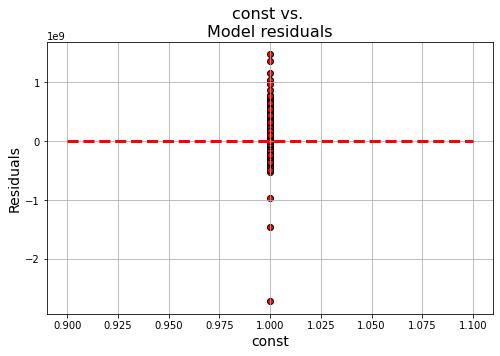

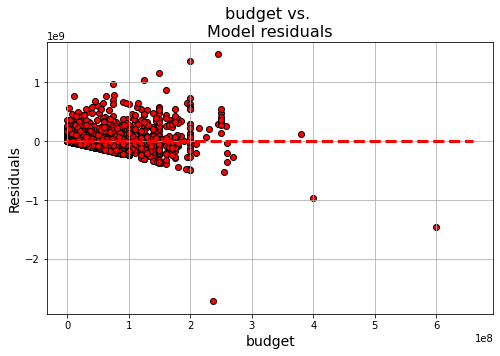

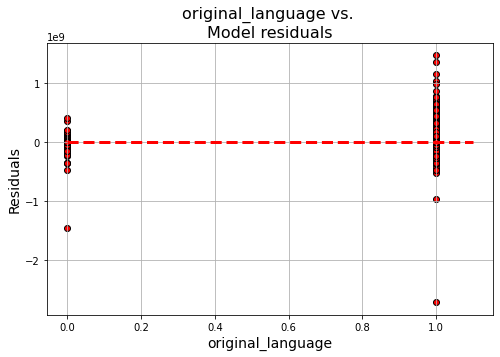

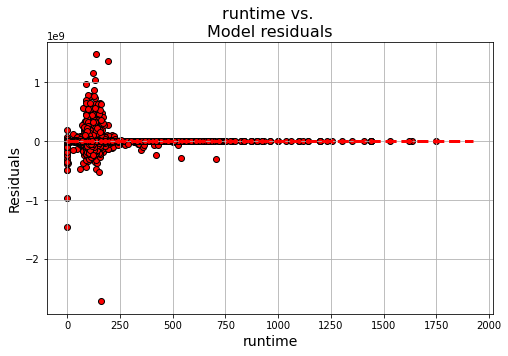

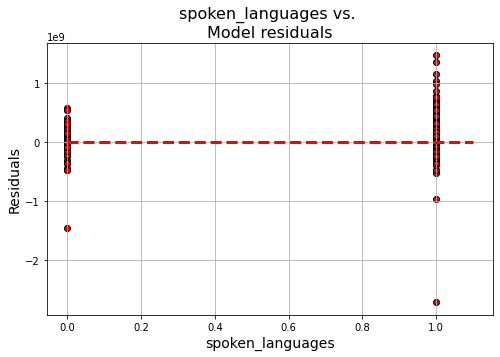

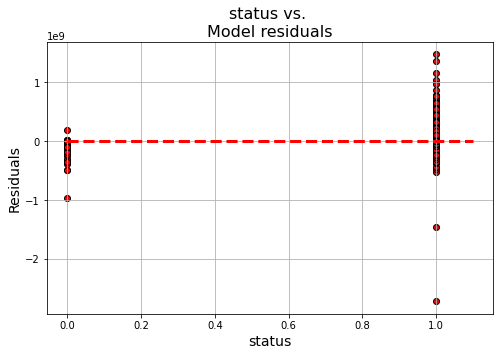

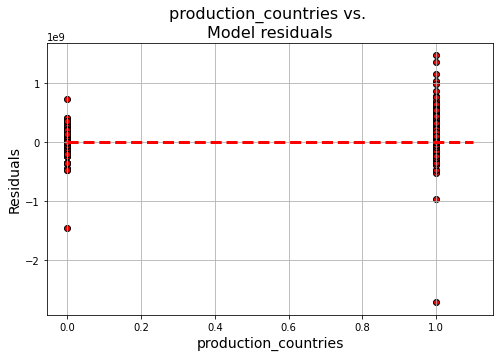

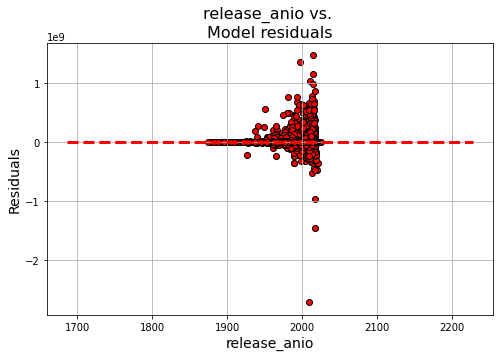

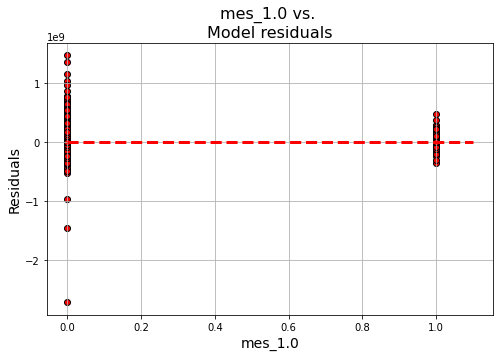

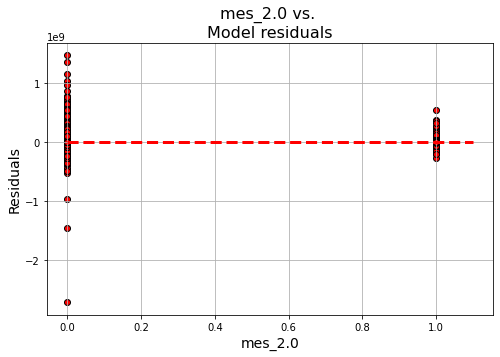

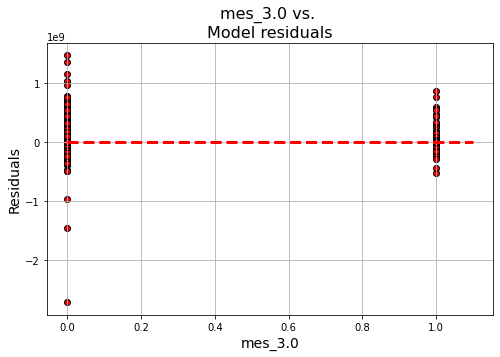

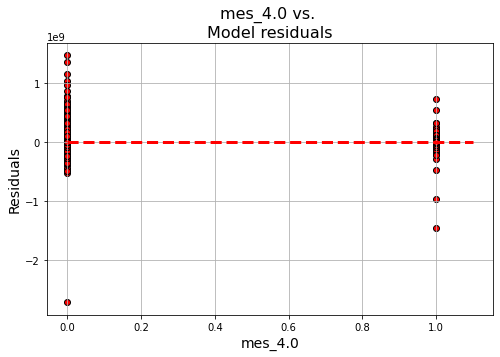

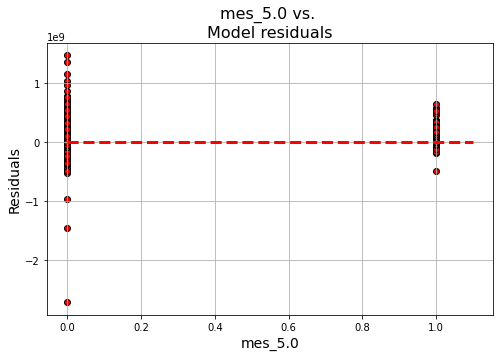

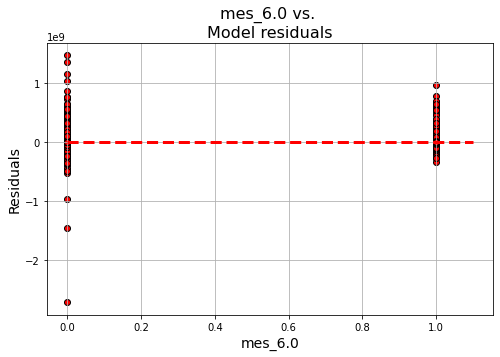

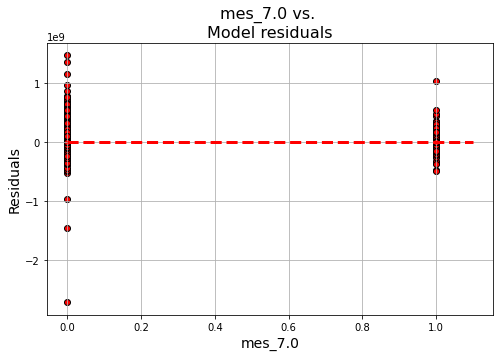

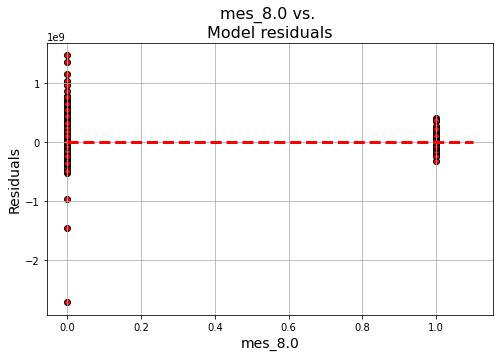

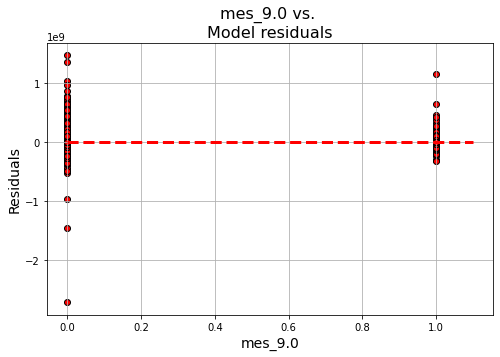

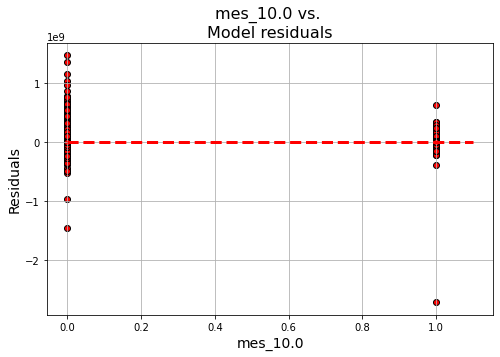

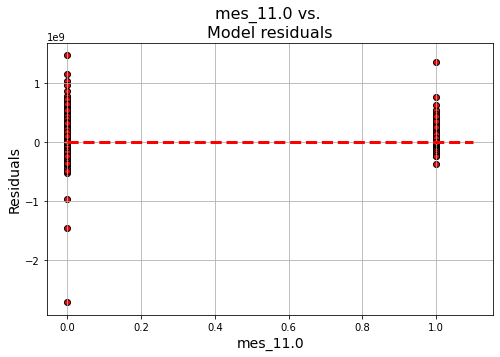

In [69]:
for c in X_train.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nModel residuals".format(c),fontsize=16)
    plt.scatter(x=X_train[c],y=slr_reg.resid,color='red',edgecolor='k')
    plt.grid(True)
    xmin=min(X_train[c])
    xmax = max(X_train[c])
    plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Residuals',fontsize=14)
    plt.show()

Los gráficos de residuos muestran cierto agrupamiento, pero en general los supuestos de linealidad e independencia parecen mantenerse porque la distribución parece aleatoria alrededor del eje 0.

Test

In [79]:
slr_model_test = sm.OLS(Y_test, X_test)# Ordinary Least Squares 
slr_reg_test = slr_model_test.fit()

In [80]:
print(cl(slr_reg_test.summary(), attrs = ['bold']))

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     5347.
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        01:48:09   Log-Likelihood:            -1.1869e+06
No. Observations:               65806   AIC:                         2.374e+06
Df Residuals:                   65786   BIC:                         2.374e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.074e+07 

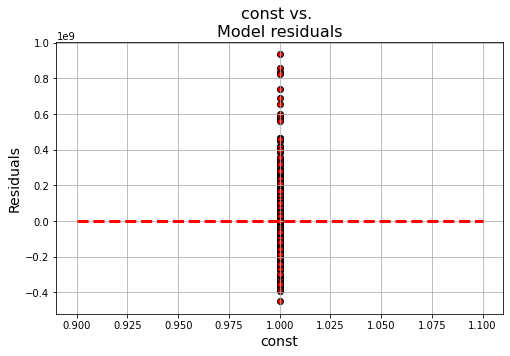

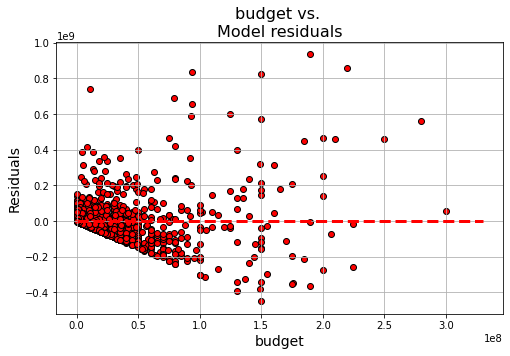

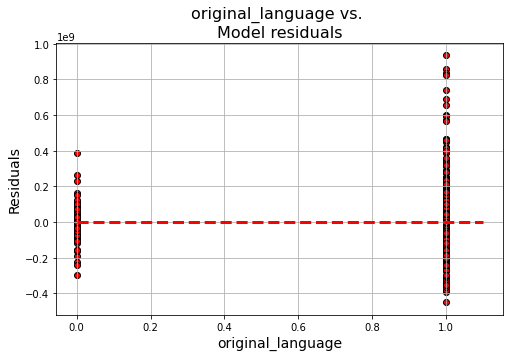

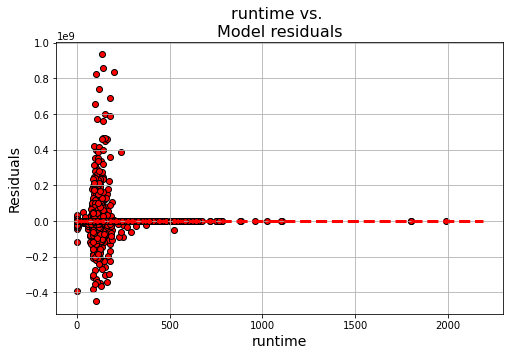

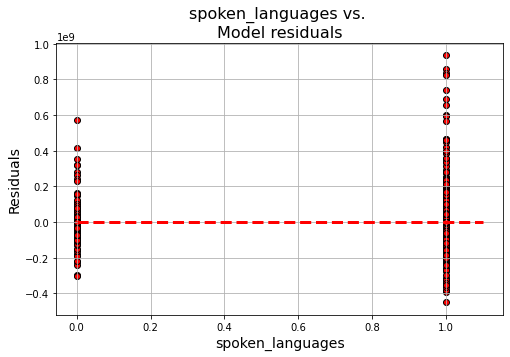

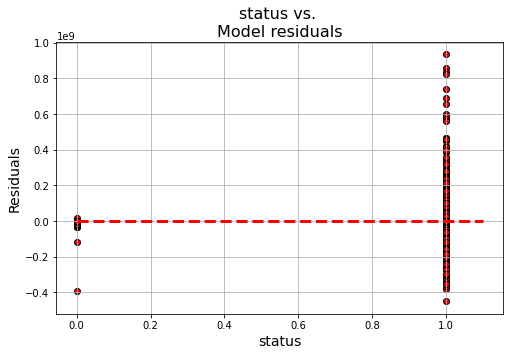

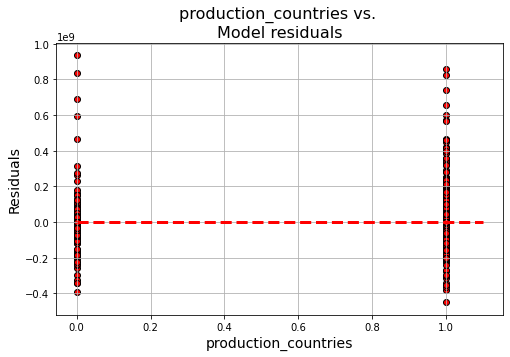

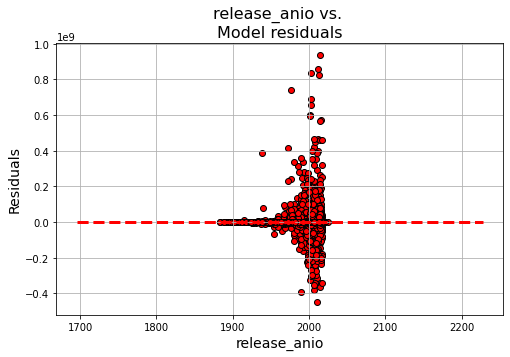

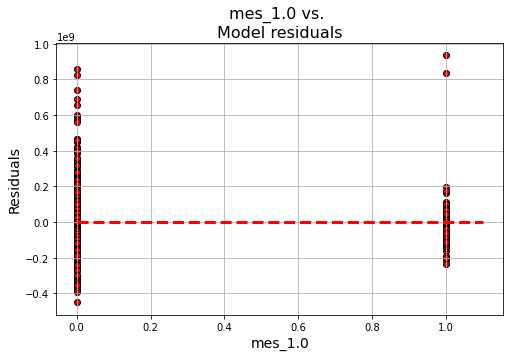

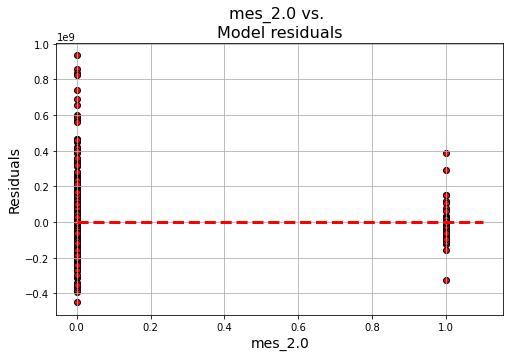

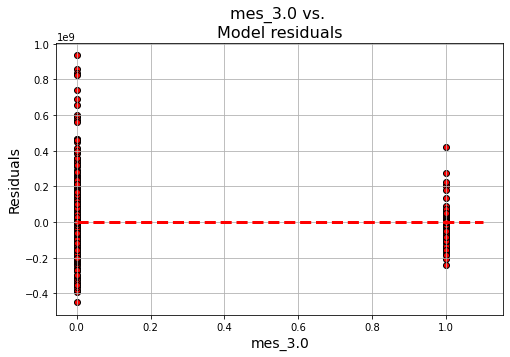

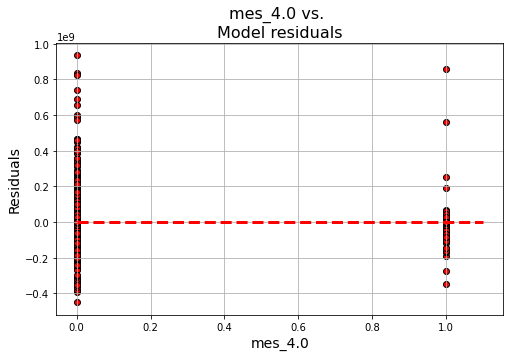

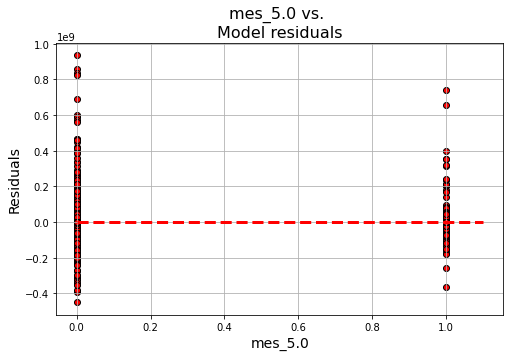

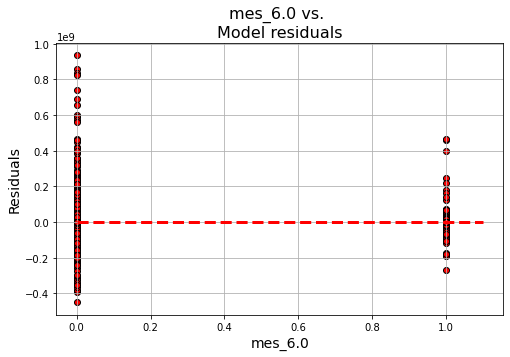

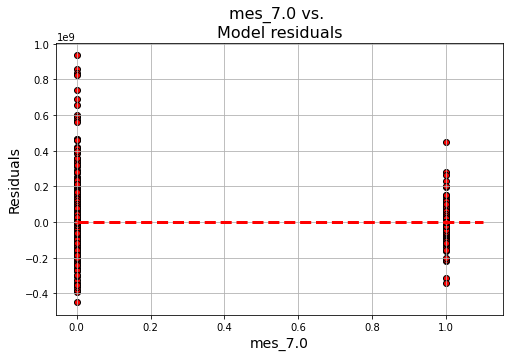

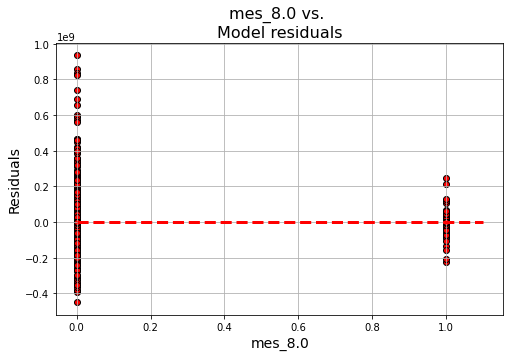

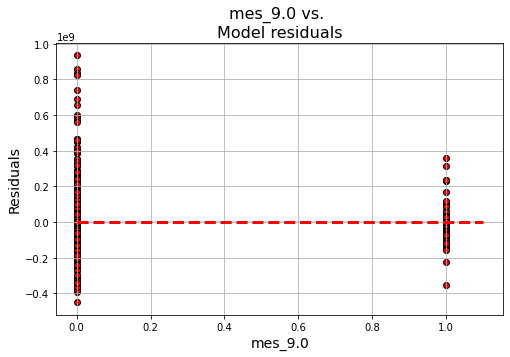

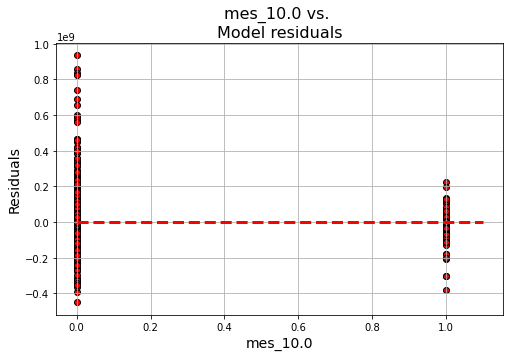

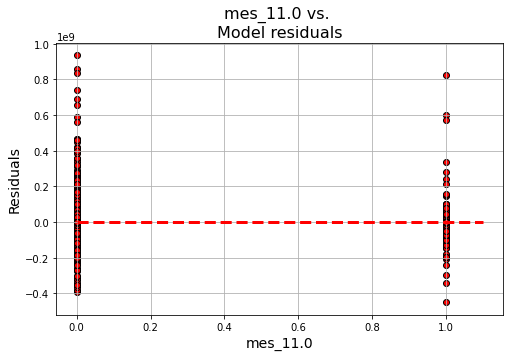

In [81]:
for c in X_test.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nModel residuals".format(c),fontsize=16)
    plt.scatter(x=X_test[c],y=slr_reg_test.resid,color='red',edgecolor='k')
    plt.grid(True)
    xmin=min(X_test[c])
    xmax = max(X_test[c])
    plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Residuals',fontsize=14)
    plt.show()

# **Otro modelo con diferente especificación**
Modelo 2

In [82]:
X_train2 = X_train[['const', 'budget','original_language','production_countries','release_anio','genres_2']]

In [83]:
import statsmodels.api as sm
from termcolor import colored as cl

slr_model2 = sm.OLS(Y_train, X_train2) # Ordinary Least Squares 
slr_reg2 = slr_model2.fit()

In [84]:
print(cl(slr_reg2.summary(), attrs = ['bold']))

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                 5.642e+04
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        01:54:50   Log-Likelihood:            -4.7415e+06
No. Observations:              263224   AIC:                         9.483e+06
Df Residuals:                  263218   BIC:                         9.483e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.815e+06 

Se mejoro en parsimonia y el R cuadrado no se vio afectado. El modelo es estadisticamente significactivo. 

Test

In [76]:
X_test2 = X_test[['const', 'budget','original_language','production_countries','release_anio','genres_2']]

In [77]:
slr_model2 = sm.OLS(Y_test, X_test2) # Ordinary Least Squares 
slr_reg2 = slr_model2.fit()
print(cl(slr_reg2.summary(), attrs = ['bold']))

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                 2.031e+04
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        01:44:21   Log-Likelihood:            -1.1869e+06
No. Observations:               65806   AIC:                         2.374e+06
Df Residuals:                   65800   BIC:                         2.374e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.299e+07 

In [ ]:
slr_model2 = sm.OLS(Y_test, X_test2) # Ordinary Least Squares 
slr_reg2 = slr_model2.fit()
print(cl(slr_reg2.summary(), attrs = ['bold']))

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                 2.245e+04
Date:                Mon, 04 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:56:47   Log-Likelihood:            -1.1885e+06
No. Observations:               65809   AIC:                         2.377e+06
Df Residuals:                   65804   BIC:                         2.377e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.003e+07   5.05e+0

El modelo es estadisticamente significativo. Por cada dolar invertido en el prespuesto se estima que hay un retorno de 2.7795 dólares

**Evaluación del modelo**

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

 
Mean Squared Error (MSE) is the mean of the squared errors:

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:


In [93]:
from sklearn import metrics

MODELO 1


In [100]:
Y_pred = slr_reg.predict(X_train)

# RMSE
print(np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))
print(metrics.mean_absolute_error(Y_train, Y_pred))
print(metrics.mean_squared_error(Y_train, Y_pred))

16093562.62613273
1526271.3962722127
259002758001256.25


MODELO 2

In [96]:
# Predict
Y_pred2 = slr_reg2.predict(X_train2)

# RMSE
print(np.sqrt(metrics.mean_squared_error(Y_train, Y_pred2)))
print(metrics.mean_absolute_error(Y_train, Y_pred))
print(metrics.mean_squared_error(Y_train, Y_pred))

16573733.98930213
1565013.9508579876
274688658348148.72


El modelo 1 se comporta mejor. 

# **Clasificación PROXIMAMENTE**


En caso que establecieramos revenue como una variable docotomica donde tomara valor 1 si sus valores son distiintos de 0 y valor 0 si sus valores son iguales a cero, podríamos procurar predecir las distintas peliculas. 

**Modelo Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, Y_train)
print('Random Forest R squared: %.3f' % forest_reg.score(X_test, Y_test))

y_hat = forest_reg.predict(X_test)
forest_mse = mean_squared_error(Y_test, yhat)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.3f' % forest_rmse)

Random Forest R squared: 0.742
Random Forest RMSE: 12242956.014
